In [2]:
import numpy as np
import pandas as pd
import warnings
import json

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

df = pd.read_csv("../Boxcox_data.csv")
data =df.values

Y = df["Outcome"].values
X = df[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']].values
names = ['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']


sc = 'f1_macro'

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

clfrf = RandomForestClassifier(n_estimators=45, max_depth= 21, max_features= 7, min_samples_split= 2, min_samples_leaf=2, bootstrap=True)
#clfSVC =  SVC(C= 20, kernel = 'linear', probability= True)
clfSVC = SVC(C= 100, gamma= 'scale', kernel = 'linear', probability= True)
clfGBDT = GradientBoostingClassifier(n_estimators= 45, max_depth= 9, max_features= 6,  min_samples_leaf= 4, min_samples_split= 4)
#clfXGBT = XGBClassifier(n_estimators=35, max_depth= 5, learning_rate= 0.01)
clfXGBT = XGBClassifier(n_estimators= 55, max_depth= 6, min_child_weight= 1, learning_rate= 0.01, gamma=0.1)

df_weights = pd.read_csv("../Weight_new.csv")

print(df_weights[df_weights.columns[0]])
df_weights = df_weights.drop([df_weights.columns[0],df_weights.columns[-1]], axis= 1)



0      RF
1     SVM
2    GBDT
3     XGB
Name: blank, dtype: object


In [4]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, ShuffleSplit

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
max_score = 0
max_weights = []
for index, col in tqdm(df_weights.iteritems()):
    #print(col)
    clf_weights = col.values[:4]*10
    print(clf_weights)
    vclf = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='soft', weights= clf_weights)
    score = cross_val_score(vclf, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 16, scoring= sc)
    print(score)
    print(sum(score)/len(score))

    if max_score<(sum(score)/len(score)):
        max_weights = clf_weights
        max_score = sum(score)/len(score)

print(max_score, max_weights)    

0it [00:00, ?it/s]

[1. 1. 3. 5.]


1it [00:23, 23.95s/it]

[0.7478837  0.81231524 0.80316092 0.85062305 0.77723577 0.77267699
 0.82036713 0.78128991 0.80567376 0.7423456 ]
0.7913572064435932
[1. 1. 4. 4.]


2it [00:50, 25.74s/it]

[0.85407791 0.75283505 0.80839161 0.7882223  0.80839161 0.81597738
 0.80723618 0.84928493 0.83385308 0.85661957]
0.8174889619931225
[1. 1. 5. 3.]


3it [01:15, 25.00s/it]

[0.75311271 0.75304636 0.82455391 0.79800131 0.79255894 0.74525022
 0.84032634 0.78044872 0.81231524 0.73098267]
0.7830596429696149
[1. 2. 2. 5.]


4it [01:37, 24.06s/it]

[0.79912023 0.79242424 0.76527698 0.84340104 0.84540736 0.80428571
 0.75159637 0.794797   0.77421056 0.84340104]
0.8013920547258235
[1. 2. 3. 4.]


5it [02:00, 23.63s/it]

[0.81360544 0.75535714 0.7882223  0.77982143 0.7697479  0.73089286
 0.824795   0.81486486 0.76264726 0.78389373]
0.7823847938160597
[1. 2. 4. 3.]


6it [02:24, 23.78s/it]

[0.83306777 0.82559464 0.80418265 0.77069385 0.82455391 0.77857308
 0.77776829 0.7835703  0.79153987 0.78128991]
0.7970834272288189
[1. 2. 5. 2.]


7it [02:51, 24.94s/it]

[0.82036713 0.83207153 0.82036713 0.81011781 0.80794393 0.82928349
 0.86292619 0.72752015 0.80040793 0.87408978]
0.8185095068156091
[1. 3. 1. 5.]


8it [03:14, 24.18s/it]

[0.78128991 0.82259933 0.86568627 0.67799145 0.72323232 0.7882223
 0.78389373 0.83799764 0.74741888 0.81930889]
0.784764073282423
[1. 3. 2. 4.]


9it [03:34, 22.96s/it]

[0.81238588 0.79242424 0.8011611  0.82938979 0.82036713 0.79660657
 0.80428571 0.82503193 0.80812325 0.81651786]
0.8106293470091804
[1. 3. 3. 3.]


10it [04:01, 24.01s/it]

[0.74525022 0.83799764 0.76295795 0.84690294 0.79255894 0.85959795
 0.7882223  0.85758836 0.80418265 0.84183791]
0.8137096864133928
[1. 3. 4. 2.]


11it [04:25, 24.07s/it]

[0.85182782 0.79099924 0.84690294 0.8011611  0.79966136 0.83323189
 0.83385884 0.77504105 0.81011781 0.81231524]
0.8155117281207904
[1. 3. 5. 1.]


12it [04:48, 23.76s/it]

[0.80812325 0.83855219 0.76740238 0.83855219 0.87488584 0.77555701
 0.80418265 0.7611457  0.84032634 0.80794393]
0.8116671481553844
[1. 4. 1. 4.]


13it [05:12, 23.96s/it]

[0.83349325 0.79613095 0.83323189 0.81597738 0.80418265 0.84351799
 0.72258567 0.82074963 0.79613095 0.78638254]
0.805238290908816
[1. 4. 2. 3.]


14it [05:36, 23.78s/it]

[0.81651786 0.81170669 0.80316092 0.77112459 0.74081081 0.86331066
 0.85729167 0.7835703  0.86877395 0.77723577]
0.8093503210037897
[1. 4. 3. 2.]


15it [05:56, 22.84s/it]

[0.79613095 0.83855219 0.76936027 0.77267699 0.83534818 0.78638254
 0.73874905 0.82036713 0.81486486 0.85729167]
0.8029723828323172
[1. 4. 4. 1.]


16it [06:20, 22.95s/it]

[0.74692118 0.83845805 0.75311271 0.83207153 0.768053   0.84288991
 0.83207153 0.7835703  0.76295795 0.76657807]
0.7926684222379592
[1. 5. 1. 3.]


17it [06:42, 22.93s/it]

[0.7478837  0.84288991 0.77574405 0.78638254 0.81360544 0.78638254
 0.82044561 0.79153987 0.81170669 0.7652648 ]
0.7941845125182825
[1. 5. 2. 2.]


18it [07:07, 23.33s/it]

[0.81324245 0.79800131 0.77112459 0.78137792 0.82074963 0.78660436
 0.82044561 0.84324943 0.77555701 0.80839161]
0.8018743933738988
[1. 5. 3. 1.]


19it [07:31, 23.52s/it]

[0.77574405 0.81651786 0.79613095 0.768053   0.83385308 0.86161616
 0.90505891 0.7611457  0.82259933 0.82074963]
0.8161468677439535
[2. 1. 2. 5.]


20it [07:54, 23.56s/it]

[0.75620224 0.76264726 0.73839768 0.79966136 0.73497024 0.77555701
 0.78875283 0.79521674 0.75535714 0.77319669]
0.7679959191902948
[2. 1. 3. 4.]


21it [08:19, 23.89s/it]

[0.80812325 0.77069385 0.85742038 0.74392523 0.81231524 0.81170669
 0.86533421 0.76390023 0.84127309 0.88024476]
0.8154936917216526
[2. 1. 4. 3.]


22it [08:47, 25.06s/it]

[0.75159637 0.71567688 0.82938979 0.824795   0.74392523 0.87641753
 0.82044561 0.75535714 0.82938979 0.82503193]
0.7972025279119446
[2. 1. 5. 2.]


23it [09:13, 25.50s/it]

[0.83385884 0.67509881 0.80839161 0.7652648  0.81011781 0.81639732
 0.77574405 0.84032634 0.77857308 0.73653846]
0.7840311117860347
[2. 2. 1. 5.]


24it [09:36, 24.57s/it]

[0.76048951 0.79660657 0.768053   0.81939915 0.78389373 0.75311271
 0.8464986  0.85758836 0.82856091 0.79153987]
0.8005742419137007
[2. 2. 2. 4.]


25it [09:57, 23.73s/it]

[0.78893557 0.83385884 0.81712433 0.79255894 0.79966136 0.81939915
 0.83799764 0.84690294 0.74703245 0.82044561]
0.8103916828639113
[2. 2. 3. 3.]


26it [10:21, 23.71s/it]

[0.84928493 0.80418265 0.80812325 0.81238588 0.75786497 0.78638254
 0.85471898 0.84540736 0.80664176 0.75535714]
0.8080349458293465
[2. 2. 4. 2.]


27it [10:45, 23.65s/it]

[0.85407791 0.78044872 0.8869637  0.82875    0.78660436 0.78044872
 0.79521674 0.7652648  0.87767857 0.88119827]
0.8236651775916364
[2. 2. 5. 1.]


28it [11:09, 23.91s/it]

[0.84032634 0.83690476 0.87158411 0.80738588 0.78389373 0.80316092
 0.83385308 0.82928349 0.78638254 0.82938979]
0.8222164644017452
[2. 3. 1. 4.]


29it [11:31, 23.31s/it]

[0.824795   0.88487395 0.83799764 0.83754941 0.75602212 0.86028555
 0.69421996 0.83534818 0.7835703  0.72309807]
0.8037760176606052
[2. 3. 2. 3.]


30it [11:55, 23.50s/it]

[0.82319322 0.80439749 0.78638254 0.81651786 0.7478837  0.84540736
 0.77857308 0.76552904 0.81047431 0.81011781]
0.7988476389350787
[2. 3. 3. 2.]


31it [12:20, 23.98s/it]

[0.81639732 0.82938979 0.824795   0.73891199 0.76295795 0.84032634
 0.81639732 0.79660657 0.81639732 0.77280265]
0.801498225738186
[2. 3. 4. 1.]


32it [12:44, 24.05s/it]

[0.77319669 0.82938979 0.76295795 0.75602212 0.80839161 0.75311271
 0.80794393 0.83797074 0.86331066 0.83385884]
0.8026155033949776
[2. 4. 1. 3.]


33it [13:05, 23.02s/it]

[0.83207153 0.81231524 0.81011781 0.80418265 0.81011781 0.82395774
 0.77723577 0.86028555 0.79800131 0.79800131]
0.8126286714412894
[2. 4. 2. 2.]


34it [13:29, 23.44s/it]

[0.80664176 0.79800131 0.76264726 0.79800131 0.80418265 0.83323189
 0.78887772 0.85407791 0.80038854 0.79242424]
0.8038474598110039
[2. 4. 3. 1.]


35it [13:53, 23.59s/it]

[0.79660657 0.72216077 0.824795   0.82928349 0.71564965 0.7835703
 0.79153987 0.824795   0.82731092 0.89806548]
0.8013777054572507
[2. 5. 1. 2.]


36it [14:16, 23.32s/it]

[0.81597738 0.80040793 0.7652648  0.794797   0.75632411 0.73891199
 0.76295795 0.77857308 0.73329007 0.77504105]
0.7721545351889083
[2. 5. 2. 1.]


37it [14:39, 23.34s/it]

[0.7652648  0.79635135 0.68277459 0.73098267 0.73497024 0.80664176
 0.79227372 0.83385308 0.77555701 0.7478837 ]
0.7666552912633964
[3. 1. 1. 5.]


38it [15:03, 23.49s/it]

[0.82856091 0.80418265 0.78128991 0.78137792 0.8011611  0.72999606
 0.79800131 0.80040793 0.76048951 0.83690476]
0.7922372068406947
[3. 1. 2. 4.]


39it [15:26, 23.26s/it]

[0.76740238 0.82259933 0.77982143 0.83690476 0.79966136 0.81651786
 0.7835703  0.88119827 0.78638254 0.82319322]
0.8097251430298344
[3. 1. 3. 3.]


40it [15:50, 23.56s/it]

[0.82036713 0.82036713 0.79242424 0.84928493 0.87767857 0.72900183
 0.82395774 0.79966136 0.76936027 0.77857308]
0.8060676275729518
[3. 1. 4. 2.]


41it [16:13, 23.48s/it]

[0.85471898 0.83385884 0.81597738 0.79099924 0.67193487 0.81639732
 0.81639732 0.79660657 0.80664176 0.81170669]
0.8015238963147026
[3. 1. 5. 1.]


42it [16:36, 23.28s/it]

[0.80794393 0.78044872 0.83044554 0.83840977 0.82259933 0.81639732
 0.83799764 0.75056022 0.82503193 0.78128991]
0.8091124306642955
[3. 2. 1. 4.]


43it [16:58, 22.88s/it]

[0.79242424 0.80839161 0.84183791 0.8011611  0.82077446 0.87196262
 0.74703245 0.77555701 0.84540736 0.74984784]
0.8054396600674683
[3. 2. 2. 3.]


44it [17:22, 23.13s/it]

[0.79242424 0.80812325 0.76936027 0.77112459 0.76740238 0.80439749
 0.7405303  0.7652648  0.78955453 0.79800131]
0.7806183161123637
[3. 2. 3. 2.]


45it [17:44, 22.89s/it]

[0.84032634 0.86889952 0.7652648  0.81486486 0.79153987 0.8725412
 0.78875283 0.82259933 0.8464986  0.73839768]
0.8149685033214729
[3. 2. 4. 1.]


46it [18:08, 23.28s/it]

[0.77319669 0.80794393 0.85729167 0.77982143 0.83385884 0.794797
 0.73904762 0.81548822 0.81231524 0.82928349]
0.8043044113509865
[3. 3. 1. 3.]


47it [18:32, 23.41s/it]

[0.81712433 0.86889952 0.83207153 0.75535714 0.80316092 0.81651786
 0.84351799 0.80794393 0.81238588 0.77857308]
0.8135552172321404
[3. 3. 2. 2.]


48it [18:56, 23.42s/it]

[0.85407791 0.80418265 0.74571673 0.824795   0.79660657 0.79966136
 0.78128991 0.80439749 0.7652648  0.86877395]
0.8044766369472585
[3. 3. 3. 1.]


49it [19:17, 22.70s/it]

[0.77112459 0.84690294 0.7611457  0.82044561 0.87370944 0.76390023
 0.80428571 0.79153987 0.79800131 0.86307824]
0.8094133642093999
[3. 4. 1. 2.]


50it [19:43, 23.93s/it]

[0.79153987 0.79660657 0.80439749 0.7652648  0.80794393 0.84351799
 0.77280265 0.80040793 0.82044561 0.81238588]
0.8015312708204562
[3. 4. 2. 1.]


51it [20:09, 24.47s/it]

[0.81170669 0.76295795 0.81712433 0.84340104 0.78660436 0.78638254
 0.80418265 0.73874905 0.82938979 0.75508801]
0.7935586397878988
[3. 5. 1. 1.]


52it [20:35, 24.86s/it]

[0.78875283 0.74740417 0.77112459 0.80664176 0.85959795 0.82036713
 0.794797   0.80664176 0.83385884 0.81170669]
0.804089273492476
[4. 1. 1. 4.]


53it [21:03, 25.80s/it]

[0.82044561 0.80316092 0.80038854 0.78137792 0.83845805 0.80316092
 0.80664176 0.83799764 0.82036713 0.77112459]
0.8083123080508099
[4. 1. 2. 3.]


54it [21:30, 26.13s/it]

[0.80738588 0.78389373 0.7423456  0.77723577 0.86533421 0.7423456
 0.84540736 0.7835703  0.7652648  0.78660436]
0.7899387602756297
[4. 1. 3. 2.]


55it [21:55, 25.83s/it]

[0.85062305 0.80040793 0.83385884 0.83207153 0.80418265 0.74525022
 0.79613095 0.75159637 0.82928349 0.78660436]
0.8030009396815115
[4. 1. 4. 1.]


56it [22:21, 25.84s/it]

[0.78875283 0.7652648  0.81939915 0.73839768 0.81324245 0.86231156
 0.7882223  0.84540736 0.82928349 0.79966136]
0.8049942978917434
[4. 2. 1. 3.]


57it [22:45, 25.33s/it]

[0.84351799 0.7574848  0.75159637 0.86877395 0.82928349 0.84110825
 0.79613095 0.7882223  0.80428571 0.80040793]
0.8080811741863053
[4. 2. 2. 2.]


58it [23:09, 24.95s/it]

[0.77319669 0.76264726 0.82074963 0.84351799 0.88263849 0.86231156
 0.81047431 0.81047431 0.84794673 0.83534818]
0.8249305147897477
[4. 2. 3. 1.]


59it [23:32, 24.49s/it]

[0.86028555 0.7882223  0.81231524 0.7594189  0.72900183 0.78137792
 0.77857308 0.77112459 0.79099924 0.87408978]
0.7945408430257388
[4. 3. 1. 2.]


60it [23:58, 24.84s/it]

[0.75304636 0.82928349 0.86028555 0.81238588 0.87408978 0.80418265
 0.81238588 0.75535714 0.8011611  0.78814433]
0.809032217095248
[4. 3. 2. 1.]


61it [24:21, 24.32s/it]

[0.80664176 0.79153987 0.76390023 0.77776829 0.8011611  0.88468013
 0.80316092 0.79255894 0.79242424 0.79800131]
0.8011836799281037
[4. 4. 1. 1.]


62it [24:43, 23.40s/it]

[0.75535714 0.82044561 0.80794393 0.75535714 0.77776829 0.81170669
 0.80664176 0.85959795 0.824795   0.85729167]
0.8076905180054064
[5. 1. 1. 3.]


63it [25:07, 23.70s/it]

[0.83385884 0.80316092 0.80794393 0.81170669 0.81639732 0.67015597
 0.72323232 0.81597738 0.77555701 0.8482835 ]
0.790627387474802
[5. 1. 2. 2.]


64it [25:31, 23.87s/it]

[0.79800131 0.73891199 0.77069385 0.78488433 0.83855219 0.82395774
 0.80316092 0.83323189 0.80418265 0.7652648 ]
0.796084167120458
[5. 1. 3. 1.]


65it [25:53, 23.40s/it]

[0.78638254 0.77267699 0.79242424 0.76390023 0.85471898 0.8543328
 0.81596623 0.79966136 0.86601971 0.82938979]
0.8135472859711227
[5. 2. 1. 2.]


66it [26:17, 23.47s/it]

[0.8011611  0.82044561 0.79242424 0.84183791 0.83799764 0.78389373
 0.85742038 0.80794393 0.76487414 0.7882223 ]
0.8096220989968785
[5. 2. 2. 1.]


67it [26:40, 23.90s/it]

[0.78339921 0.72154472 0.81639732 0.80839161 0.81651786 0.78955453
 0.77555701 0.794797   0.89544162 0.7462963 ]
0.7947897169262863
0.8249305147897477 [4. 2. 2. 2.]


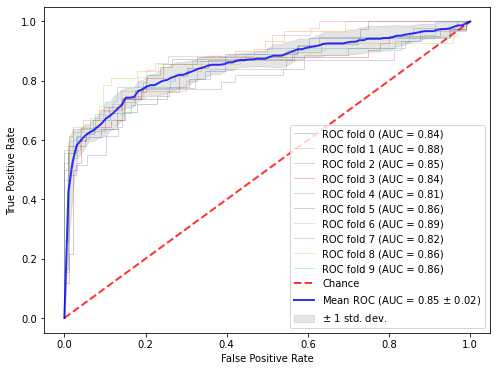

In [7]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
max_weights = [3,2,3,2]
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
classifier = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='soft', weights= max_weights)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, ShuffleSplit

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
max_score = 0
max_weights = []
for index, col in tqdm(df_weights.iteritems()):
    #print(col)
    clf_weights = col.values[:4]*10
    print(clf_weights)
    vclf = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='hard', weights= clf_weights)
    score = cross_val_score(vclf, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8, scoring= sc)
    print(score)
    print(sum(score)/len(score))

    if max_score<(sum(score)/len(score)):
        max_weights = clf_weights
        max_score = sum(score)/len(score)

print(max_score, max_weights)

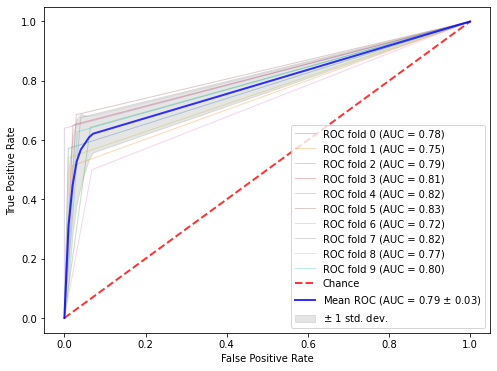

In [ ]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
classifier = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='hard', weights= max_weights)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict(X[test])
    # y_score.shape==(75, 3)
    if len(y_score.shape)<= 1 :
        y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 0])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_score[:,0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1])

In [ ]:
Y[test]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1])